# Reading Rent Flats

This dataset is composed of multiple files where each file corresponds to a set of flats of each city in Spain, for instance, we have the rent flats in Lleida. The data is provided by Idealista and we can know different features like price, location, etc.

Also, the dataset files have one format (json) because the information provided by Idealista is returned in json format.

In [1]:
import io
import json
import requests
from pathlib import Path

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

## Reading JSON files

Each JSON file available in the dataset is a list where each element contains the information of a single apartment. To read the JSON files as a list of dictionaries in python we use the standard library `json`.

The data will be read from data/raw directory.



In [2]:
DATA_PATH = Path('../data/raw')

To create the dataset, we performed searches from a different location with a radius of 10km, for instance, if we look for an apartment at Tarragona, we locate ourselves at the center of the city (by geographic coordinates) and from there we look up flats in a 10km radius.

Each file contains the flats of a city. We list all the files available in our dataset:

In [3]:
list(map(str, DATA_PATH.glob('*.json')))

['../data/raw/Melilla_rent.json',
 '../data/raw/Grancanaria_rent.json',
 '../data/raw/Cadiz_rent.json',
 '../data/raw/Girona_rent.json',
 '../data/raw/Soria_rent.json',
 '../data/raw/Caceres_rent.json',
 '../data/raw/Valencia_rent.json',
 '../data/raw/Malaga_rent.json',
 '../data/raw/Ourense_rent.json',
 '../data/raw/Granada_rent.json',
 '../data/raw/Teruel_rent.json',
 '../data/raw/Madrid_rent.json',
 '../data/raw/Tarragona_rent.json',
 '../data/raw/Tenerife_rent.json',
 '../data/raw/Valladolid_rent.json',
 '../data/raw/Oviedo_rent.json',
 '../data/raw/Barna_rent.json',
 '../data/raw/Terrassa_rent.json',
 '../data/raw/Coruña_rent.json',
 '../data/raw/Lleida_rent.json',
 '../data/raw/Navarra_rent.json',
 '../data/raw/Sevilla_rent.json',
 '../data/raw/Bilbao_rent.json',
 '../data/raw/Mallorca_rent.json',
 '../data/raw/Cartagena_rent.json',
 '../data/raw/Badalona_rent.json',
 '../data/raw/Zaragoza_rent.json',
 '../data/raw/Vigo_rent.json',
 '../data/raw/Canarias_rent.json',
 '../data/raw

From the paths itself, we can retrieve the city names

In [4]:
def city_from_path(fpath):
    return fpath.stem.split('_')[0]

for p in DATA_PATH.glob('*.json'):
    print(city_from_path(p))

Melilla
Grancanaria
Cadiz
Girona
Soria
Caceres
Valencia
Malaga
Ourense
Granada
Teruel
Madrid
Tarragona
Tenerife
Valladolid
Oviedo
Barna
Terrassa
Coruña
Lleida
Navarra
Sevilla
Bilbao
Mallorca
Cartagena
Badalona
Zaragoza
Vigo
Canarias
Ceuta


For simplicity, some city names have been shortened for example *Barna* corresponds to Barcelona. 

Once we determined the path, now we are going to load the JSON file. For example, the rent flats of Lleida.

In [5]:
lleida_flats = DATA_PATH / 'Lleida_rent.json'
data = json.load(lleida_flats.open())

print('Random sample of a Lleida flat:')
print(data[0])

Random sample of a Lleida flat:
{'propertyCode': '86254994', 'thumbnail': 'https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/18/ef/f8/782172025.jpg', 'externalReference': '1587', 'numPhotos': 10, 'price': 550.0, 'propertyType': 'flat', 'operation': 'rent', 'size': 105.0, 'exterior': True, 'rooms': 3, 'bathrooms': 2, 'address': 'Avenida de Rosa Parks', 'province': 'Lleida', 'municipality': 'Lleida', 'district': 'Balafia', 'country': 'es', 'latitude': 41.6281639, 'longitude': 0.6294471, 'showAddress': False, 'url': 'https://www.idealista.com/inmueble/86254994/', 'distance': '2495', 'hasVideo': False, 'newDevelopment': False, 'hasLift': True, 'priceByArea': 5.0, 'detailedType': {'typology': 'flat'}, 'suggestedTexts': {'subtitle': 'Balafia, Lleida', 'title': 'Piso en Avenida de Rosa Parks'}, 'hasPlan': False, 'has3DTour': False, 'has360': False, 'topNewDevelopment': False}


At the json above, we can see some nested JSONs which may be a problem when cleaning the data.

Now, we are going to load them as a `pandas.DataFrame`. Since we have nested JSON structures reading the data with the `json_normalize` function can be pretty handy. `json_normalize` function, normalizes semi-structured JSON data into a flat table.


In [6]:
df = pd.json_normalize(data, sep='_')
df.head()

,propertyCode,thumbnail,externalReference,numPhotos,price,propertyType,operation,size,exterior,rooms,...,topNewDevelopment,detailedType_typology,suggestedTexts_subtitle,suggestedTexts_title,floor,status,parkingSpace_hasParkingSpace,parkingSpace_isParkingSpaceIncludedInPrice,parkingSpace_parkingSpacePrice,detailedType_subTypology
0,86254994,https://img3.idealista.com/blur/WEB_LISTING/0/...,1587,10,550.0,flat,rent,105.0,True,3,...,False,flat,"Balafia, Lleida",Piso en Avenida de Rosa Parks,NaN,NaN,NaN,NaN,NaN,NaN
1,90045751,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,14,650.0,flat,rent,95.0,True,4,...,False,flat,"Universitat, Lleida","Piso en Paseo de Ronda, Lérida",7,good,True,True,NaN,NaN
2,89446908,https://img3.idealista.com/blur/WEB_LISTING/0/...,1029,27,640.0,flat,rent,96.0,True,3,...,False,flat,"Cappont, Lleida","Piso en Calle Riu Besòs, 1",1,good,NaN,NaN,NaN,NaN
3,90027477,https://img3.idealista.com/blur/WEB_LISTING/0/...,SRB_ALTA_SRB_ALTAMIRA_24749,11,550.0,flat,rent,109.0,False,3,...,False,flat,"Princep de Viana-Clot, Lleida",Piso,NaN,NaN,NaN,NaN,NaN,NaN
4,90009506,https://img3.idealista.com/blur/WEB_LISTING/0/...,14400,7,700.0,flat,rent,99.0,True,4,...,False,flat,"Centre Històric, Lleida",Piso en DOLORS LOLIN SABATE s/n,1,good,NaN,NaN,NaN,NaN


We can merge all the content from different cities in spain into a same DataFrame.

In [7]:
data = []
file_list = DATA_PATH.glob('*.json')

for p in file_list:
    jdata = json.load(p.open())
    data.extend(jdata)

df = pd.json_normalize(data, sep='_', )
df.head()

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,topNewDevelopment,detailedType_typology,suggestedTexts_subtitle,suggestedTexts_title,detailedType_subTypology,parkingSpace_hasParkingSpace,parkingSpace_isParkingSpaceIncludedInPrice,parkingSpace_parkingSpacePrice,neighborhood,newDevelopmentFinished
0,90142313,https://img3.idealista.com/blur/WEB_LISTING/0/...,#ref183,10,1,520.0,flat,rent,55.0,True,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",NaN,NaN,NaN,NaN,NaN,NaN
1,90142099,https://img3.idealista.com/blur/WEB_LISTING/0/...,#ref182,11,en,420.0,studio,rent,45.0,True,...,False,flat,"Centro, Melilla","Estudio en Calle Explorador Badía, 41",studio,NaN,NaN,NaN,NaN,NaN
2,90141814,https://img3.idealista.com/blur/WEB_LISTING/0/...,#ref181,18,3,680.0,flat,rent,65.0,True,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",NaN,NaN,NaN,NaN,NaN,NaN
3,81959602,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,23,2,650.0,flat,rent,105.0,True,...,False,flat,"El Industrial, Melilla","Piso en Calle General Polavieja, Melilla s/n",NaN,NaN,NaN,NaN,NaN,NaN
4,90128666,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,22,en,650.0,flat,rent,75.0,True,...,False,flat,"El Industrial, Melilla","Piso en Plaza de la Goleta, 5",NaN,NaN,NaN,NaN,NaN,NaN


Each row in the dataset corresponds to a property, while each column corresponds to an attribute associated with it, like the number of bedrooms, price, and location.

In [8]:
print('Number of rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of rows: 31609
Number of Columns: 40


The dataset also contains images of the properties. We now exhibit some of them.

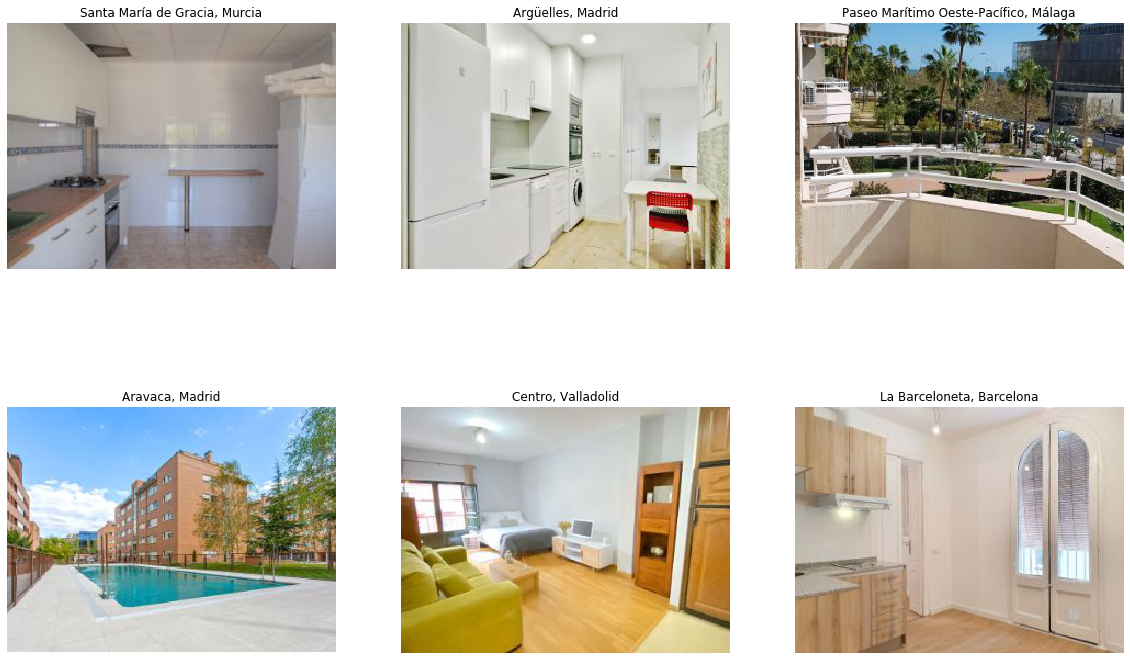

In [9]:
def download_im(url):
    return Image.open(requests.get(flat.thumbnail, stream=True).raw)

random_flats_idx = np.random.randint(0, high=df.shape[0], size=6)

plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_flats_idx, start=1):
    flat = df.iloc[idx]
    plt.subplot(3, 3, i)
    plt.title(flat.suggestedTexts_subtitle)
    plt.imshow(download_im(flat.thumbnail))
    plt.axis('off')
plt.show()


We are done for now, in this notebook we have taken a quick look at the data and learned how to read it. In the next notebook, we clean and prepare the data for a posterior Exploration Data Analysis (EDA)